In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
fifa = pd.read_csv('/Users/joelanang/Downloads/male_players (legacy).csv')
fifa_test = pd.read_csv('/Users/joelanang/Downloads/players_22-1.csv')
fifa.describe()

In [358]:
fifa

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,269011,/player/269011/ziye-zhao/230002,23,2,2022-09-26,Zhao Ziye,赵梓业,RW,46,61,...,32+2,32+2,37+2,36+2,31+2,31+2,31+2,36+2,14+2,https://cdn.sofifa.net/players/269/011/23_120.png
161579,269019,/player/269019/junjie-wu/230002,23,2,2022-09-26,Wu Junjie,吴俊杰,LB,46,58,...,41+2,41+2,43+2,44+2,48+2,48+2,48+2,44+2,15+2,https://cdn.sofifa.net/players/269/019/23_120.png
161580,271093,/player/271093/kailin-barlow/230002,23,2,2022-09-26,K. Barlow,Kailin Barlow,CDM,46,58,...,45+2,45+2,47+2,47+2,46+2,46+2,46+2,47+2,14+2,https://cdn.sofifa.net/players/271/093/23_120.png
161581,271555,/player/271555/gideon-tetteh/230002,23,2,2022-09-26,G. Tetteh,Gideon Tetteh,"RW, LW",46,70,...,30+2,30+2,34+2,32+2,28+2,28+2,28+2,32+2,15+2,https://cdn.sofifa.net/players/271/555/23_120.png


In [359]:
threshold = 0.3 * len(fifa)
fifa_dropped = fifa.dropna(thresh=threshold, axis=1)



In [360]:
fifa

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,269011,/player/269011/ziye-zhao/230002,23,2,2022-09-26,Zhao Ziye,赵梓业,RW,46,61,...,32+2,32+2,37+2,36+2,31+2,31+2,31+2,36+2,14+2,https://cdn.sofifa.net/players/269/011/23_120.png
161579,269019,/player/269019/junjie-wu/230002,23,2,2022-09-26,Wu Junjie,吴俊杰,LB,46,58,...,41+2,41+2,43+2,44+2,48+2,48+2,48+2,44+2,15+2,https://cdn.sofifa.net/players/269/019/23_120.png
161580,271093,/player/271093/kailin-barlow/230002,23,2,2022-09-26,K. Barlow,Kailin Barlow,CDM,46,58,...,45+2,45+2,47+2,47+2,46+2,46+2,46+2,47+2,14+2,https://cdn.sofifa.net/players/271/093/23_120.png
161581,271555,/player/271555/gideon-tetteh/230002,23,2,2022-09-26,G. Tetteh,Gideon Tetteh,"RW, LW",46,70,...,30+2,30+2,34+2,32+2,28+2,28+2,28+2,32+2,15+2,https://cdn.sofifa.net/players/271/555/23_120.png


In [361]:
import numpy as np
import pandas as pd

def remove_string_columns(fifa):
    # Select columns that are not of string dtype
    fifa_numeric = fifa.select_dtypes(exclude=['object'])
    return fifa_numeric

# Example usage:
# Load your dataset
fifa = pd.read_csv('/Users/joelanang/Downloads/male_players (legacy).csv')

# Call the function and assign the result to a variable
fifa_numeric = remove_string_columns(fifa)

# Inspect the new data
print(fifa_numeric.head())

   player_id  fifa_version  fifa_update  overall  potential    value_eur  \
0     158023            15            2       93         95  100500000.0   
1      20801            15            2       92         92   79000000.0   
2       9014            15            2       90         90   54500000.0   
3      41236            15            2       90         90   52500000.0   
4     167495            15            2       90         90   63500000.0   

   wage_eur  age  height_cm  weight_kg  ...  mentality_composure  \
0  550000.0   27        169         67  ...                  NaN   
1  375000.0   29        185         80  ...                  NaN   
2  275000.0   30        180         80  ...                  NaN   
3  275000.0   32        195         95  ...                  NaN   
4  300000.0   28        193         92  ...                  NaN   

   defending_marking_awareness  defending_standing_tackle  \
0                           25                         21   
1           

/var/folders/hj/nkxb1y9n2pj0wjtjhgfd0y140000gn/T/ipykernel_68871/3691325616.py:11: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa = pd.read_csv('/Users/joelanang/Downloads/male_players (legacy).csv')


In [362]:
fifa_numeric

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,158023,15,2,93,95,100500000.0,550000.0,27,169,67,...,NaN,25,21,20,6,11,15,14,8,NaN
1,20801,15,2,92,92,79000000.0,375000.0,29,185,80,...,NaN,22,31,23,7,11,15,14,11,NaN
2,9014,15,2,90,90,54500000.0,275000.0,30,180,80,...,NaN,29,26,26,10,8,11,5,15,NaN
3,41236,15,2,90,90,52500000.0,275000.0,32,195,95,...,NaN,25,41,27,13,15,10,9,12,NaN
4,167495,15,2,90,90,63500000.0,300000.0,28,193,92,...,NaN,25,25,25,87,85,92,90,86,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,269011,23,2,46,61,110000.0,700.0,18,180,73,...,40.0,23,21,25,9,13,13,12,7,NaN
161579,269019,23,2,46,58,110000.0,750.0,19,188,83,...,35.0,50,51,45,6,14,8,13,14,NaN
161580,271093,23,2,46,58,110000.0,500.0,19,181,73,...,35.0,36,45,50,8,9,7,14,9,NaN
161581,271555,23,2,46,70,150000.0,500.0,17,175,68,...,43.0,19,17,14,13,12,14,7,13,NaN


In [363]:
fifa_numeric.corr()

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
player_id,1.000000,0.433889,NaN,-0.368772,0.036648,-0.079574,-0.251547,-0.640067,-0.074743,-0.174303,...,-0.345798,-0.091955,-0.079938,-0.065170,-0.086485,-0.089632,-0.085822,-0.095257,-0.087052,-0.316863
fifa_version,0.433889,1.000000,NaN,0.047487,0.092656,0.087519,-0.086428,0.031996,0.018028,-0.019338,...,0.034099,0.042991,0.010594,0.005122,-0.000154,0.002465,0.002967,0.002688,-0.000894,-0.247266
fifa_update,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overall,-0.368772,0.047487,NaN,1.000000,0.695362,0.566827,0.611368,0.458390,0.044415,0.140015,...,0.683307,0.274173,0.250624,0.220398,-0.013603,-0.010862,-0.015521,-0.004731,-0.011783,0.385093
potential,0.036648,0.092656,NaN,0.695362,1.000000,0.533870,0.511134,-0.201506,0.006744,-0.008111,...,0.423761,0.152613,0.152078,0.134847,-0.044826,-0.044119,-0.048803,-0.042978,-0.044156,0.191200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
goalkeeping_handling,-0.089632,0.002465,NaN,-0.010862,-0.044119,-0.015770,-0.020076,0.110222,0.361193,0.339970,...,-0.445745,-0.512966,-0.522194,-0.501706,0.969490,1.000000,0.964983,0.968882,0.969626,0.294396
goalkeeping_kicking,-0.085822,0.002967,NaN,-0.015521,-0.048803,-0.017175,-0.021856,0.108064,0.358273,0.337763,...,-0.445704,-0.511830,-0.521826,-0.501221,0.965409,0.964983,1.000000,0.964387,0.965943,0.302219
goalkeeping_positioning,-0.095257,0.002688,NaN,-0.004731,-0.042978,-0.015263,-0.018705,0.118871,0.360780,0.341659,...,-0.441054,-0.509178,-0.519435,-0.498695,0.969202,0.968882,0.964387,1.000000,0.969506,0.329461
goalkeeping_reflexes,-0.087052,-0.000894,NaN,-0.011783,-0.044156,-0.015610,-0.020273,0.106004,0.361376,0.340076,...,-0.447733,-0.513083,-0.522991,-0.502051,0.973063,0.969626,0.965943,0.969506,1.000000,0.390561


<Axes: >

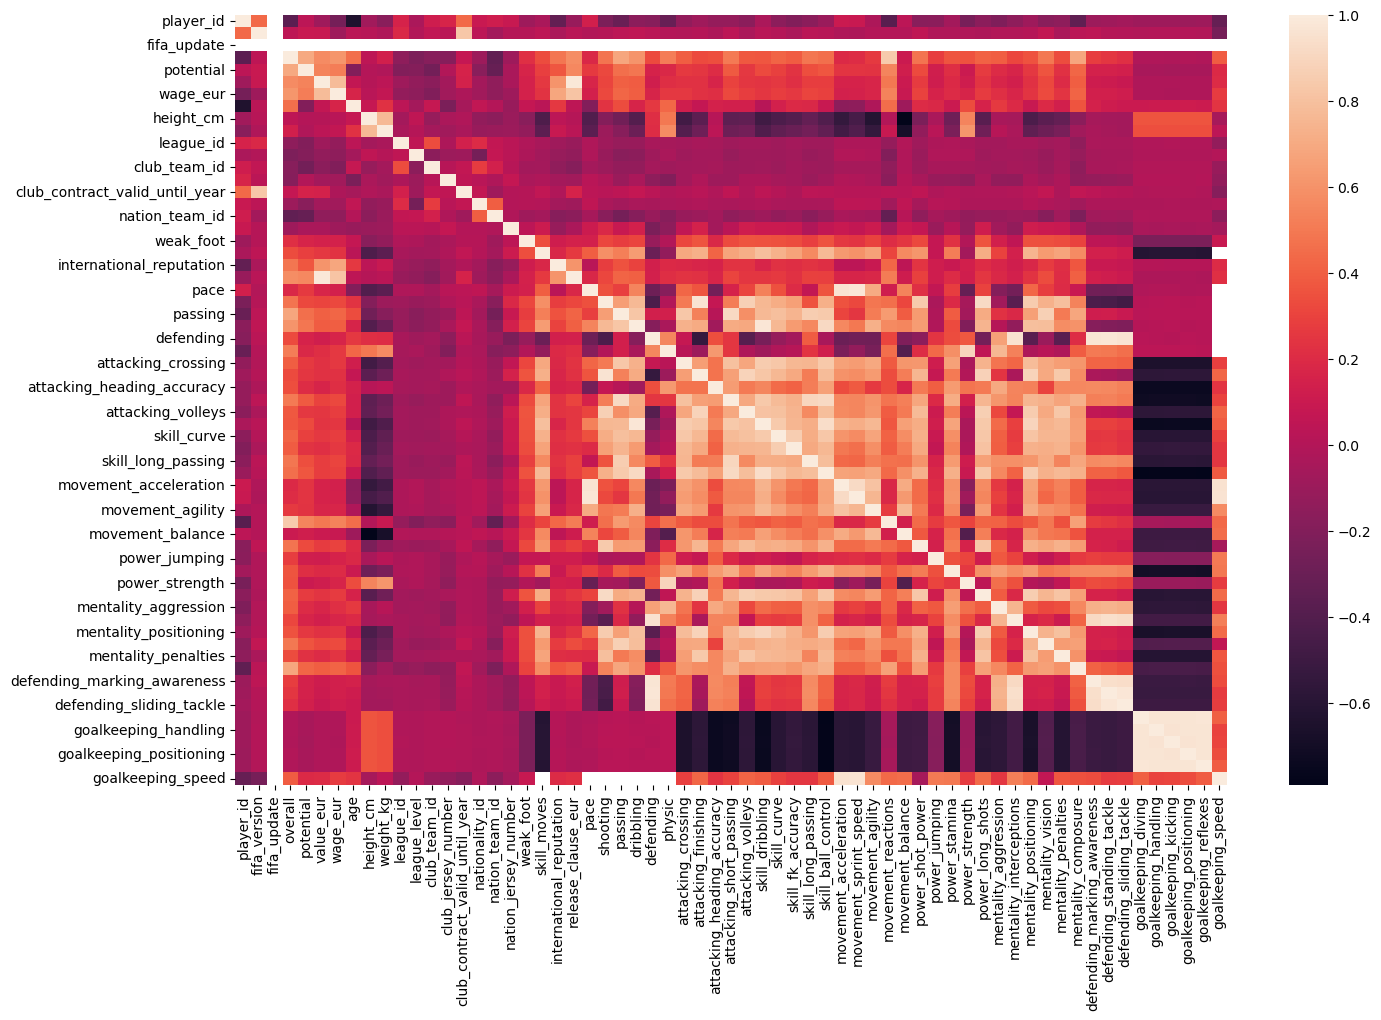

In [364]:
cor=fifa_numeric.corr()
plt.figure(figsize=(16,10))
sns.heatmap(cor)

In [365]:
import pandas as pd
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')

fifa_numeric_imputed = pd.DataFrame(imputer.fit_transform(fifa_numeric), columns=fifa_numeric.columns)

print(fifa_numeric_imputed)


        player_id  fifa_version  fifa_update  overall  potential    value_eur  \
0        158023.0          15.0          2.0     93.0       95.0  100500000.0   
1         20801.0          15.0          2.0     92.0       92.0   79000000.0   
2          9014.0          15.0          2.0     90.0       90.0   54500000.0   
3         41236.0          15.0          2.0     90.0       90.0   52500000.0   
4        167495.0          15.0          2.0     90.0       90.0   63500000.0   
...           ...           ...          ...      ...        ...          ...   
161578   269011.0          23.0          2.0     46.0       61.0     110000.0   
161579   269019.0          23.0          2.0     46.0       58.0     110000.0   
161580   271093.0          23.0          2.0     46.0       58.0     110000.0   
161581   271555.0          23.0          2.0     46.0       70.0     150000.0   
161582   271608.0          23.0          2.0     46.0       63.0     110000.0   

        wage_eur   age  hei

In [366]:
X = fifa_numeric[['age','potential','goalkeeping_handling','goalkeeping_diving','pace','shooting','passing','dribbling','defending','physic']]
y = fifa_numeric['overall']
y.shape

(161583,)

In [367]:
fifa_numeric

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,158023,15,2,93,95,100500000.0,550000.0,27,169,67,...,NaN,25,21,20,6,11,15,14,8,NaN
1,20801,15,2,92,92,79000000.0,375000.0,29,185,80,...,NaN,22,31,23,7,11,15,14,11,NaN
2,9014,15,2,90,90,54500000.0,275000.0,30,180,80,...,NaN,29,26,26,10,8,11,5,15,NaN
3,41236,15,2,90,90,52500000.0,275000.0,32,195,95,...,NaN,25,41,27,13,15,10,9,12,NaN
4,167495,15,2,90,90,63500000.0,300000.0,28,193,92,...,NaN,25,25,25,87,85,92,90,86,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,269011,23,2,46,61,110000.0,700.0,18,180,73,...,40.0,23,21,25,9,13,13,12,7,NaN
161579,269019,23,2,46,58,110000.0,750.0,19,188,83,...,35.0,50,51,45,6,14,8,13,14,NaN
161580,271093,23,2,46,58,110000.0,500.0,19,181,73,...,35.0,36,45,50,8,9,7,14,9,NaN
161581,271555,23,2,46,70,150000.0,500.0,17,175,68,...,43.0,19,17,14,13,12,14,7,13,NaN


In [368]:
X.shape

(161583, 10)

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [370]:
X_train

,age,potential,goalkeeping_handling,goalkeeping_diving,pace,shooting,passing,dribbling,defending,physic
141643,23,62,7,11,67.0,30.0,42.0,51.0,50.0,58.0
9979,23,66,59,70,NaN,NaN,NaN,NaN,NaN,NaN
35029,32,74,16,9,72.0,64.0,72.0,71.0,69.0,70.0
154267,23,72,13,9,55.0,27.0,46.0,51.0,62.0,74.0
134180,23,72,8,5,89.0,58.0,58.0,67.0,29.0,64.0
...,...,...,...,...,...,...,...,...,...,...
97639,34,64,7,11,60.0,63.0,64.0,69.0,54.0,47.0
95939,23,74,6,7,77.0,41.0,60.0,64.0,60.0,64.0
152315,20,76,6,5,69.0,38.0,55.0,58.0,63.0,64.0
117952,30,62,7,14,54.0,24.0,45.0,56.0,60.0,62.0


In [371]:
mean = X_train['pace'].mean()
X_train['pace'].fillna(mean, inplace = True)

In [372]:
mean = X_train['potential'].mean()
X_train['potential'].fillna(mean, inplace = True)

In [373]:
mean = X_train['goalkeeping_handling'].mean()
X_train['goalkeeping_handling'].fillna(mean, inplace = True)

In [374]:
mean = X_train['goalkeeping_diving'].mean()
X_train['goalkeeping_diving'].fillna(mean, inplace = True)

In [375]:
mean = X_train['shooting'].mean()
X_train['shooting'].fillna(mean, inplace = True)

In [376]:
mean = X_train['passing'].mean()
X_train['passing'].fillna(mean, inplace = True)

In [377]:
mean = X_train['dribbling'].mean()
X_train['dribbling'].fillna(mean, inplace = True)

In [378]:
mean = X_train['defending'].mean()
X_train['defending'].fillna(mean, inplace = True)

In [379]:
mean = X_train['physic'].mean()
X_train['physic'].fillna(mean, inplace = True)

In [380]:
mean = X_train['pace'].mean()
X_train['pace'].fillna(mean, inplace = True)

In [381]:
mean = X_train['pace'].mean()
X_train['pace'].fillna(mean, inplace = True)

In [382]:
X_train

,age,potential,goalkeeping_handling,goalkeeping_diving,pace,shooting,passing,dribbling,defending,physic
141643,23,62,7,11,67.000000,30.000000,42.000000,51.000000,50.000000,58.000000
9979,23,66,59,70,68.020088,52.248263,56.957956,62.107633,51.099444,64.794593
35029,32,74,16,9,72.000000,64.000000,72.000000,71.000000,69.000000,70.000000
154267,23,72,13,9,55.000000,27.000000,46.000000,51.000000,62.000000,74.000000
134180,23,72,8,5,89.000000,58.000000,58.000000,67.000000,29.000000,64.000000
...,...,...,...,...,...,...,...,...,...,...
97639,34,64,7,11,60.000000,63.000000,64.000000,69.000000,54.000000,47.000000
95939,23,74,6,7,77.000000,41.000000,60.000000,64.000000,60.000000,64.000000
152315,20,76,6,5,69.000000,38.000000,55.000000,58.000000,63.000000,64.000000
117952,30,62,7,14,54.000000,24.000000,45.000000,56.000000,60.000000,62.000000


In [383]:
nan_count = X_train.isna().sum()
print(nan_count)

age                     0
potential               0
goalkeeping_handling    0
goalkeeping_diving      0
pace                    0
shooting                0
passing                 0
dribbling               0
defending               0
physic                  0
dtype: int64


In [384]:
X_test

,age,potential,goalkeeping_handling,goalkeeping_diving,pace,shooting,passing,dribbling,defending,physic
132767,30,66,10,15,58.0,50.0,59.0,59.0,64.0,74.0
62271,24,71,14,5,68.0,63.0,59.0,61.0,50.0,66.0
82426,26,64,10,8,67.0,59.0,44.0,54.0,26.0,70.0
80931,29,63,5,13,73.0,53.0,53.0,58.0,59.0,68.0
158091,20,73,8,6,62.0,59.0,49.0,61.0,27.0,64.0
...,...,...,...,...,...,...,...,...,...,...
107437,34,73,10,7,74.0,63.0,68.0,69.0,68.0,76.0
57332,29,68,12,13,65.0,67.0,64.0,68.0,54.0,71.0
147851,25,76,7,10,66.0,56.0,65.0,67.0,65.0,80.0
67750,18,63,12,6,67.0,45.0,54.0,55.0,43.0,45.0


In [385]:
nan_count = X_test.isna().sum()
print(nan_count)

age                        0
potential                  0
goalkeeping_handling       0
goalkeeping_diving         0
pace                    7239
shooting                7239
passing                 7239
dribbling               7239
defending               7239
physic                  7239
dtype: int64


In [386]:
mean = X_test['pace'].mean()
X_test['pace'].fillna(mean, inplace = True)

In [387]:
mean = X_test['shooting'].mean()
X_test['shooting'].fillna(mean, inplace = True)

In [388]:
mean = X_test['passing'].mean()
X_test['passing'].fillna(mean, inplace = True)

In [389]:
mean = X_test['dribbling'].mean()
X_test['dribbling'].fillna(mean, inplace = True)

In [390]:
mean = X_test['defending'].mean()
X_test['defending'].fillna(mean, inplace = True)

In [391]:
mean = X_test['physic'].mean()
X_test['physic'].fillna(mean, inplace = True)

In [392]:
nan_count = X_test.isna().sum()
print(nan_count)

age                     0
potential               0
goalkeeping_handling    0
goalkeeping_diving      0
pace                    0
shooting                0
passing                 0
dribbling               0
defending               0
physic                  0
dtype: int64


In [393]:
from sklearn.linear_model import LinearRegression
lin_regressor=LinearRegression()
lin_regressor.fit(X_train,y_train)

LinearRegression()

In [394]:
prediction_linear=lin_regressor.predict(X_test)
prediction_linear

array([66.60758572, 65.42060639, 60.47697988, ..., 72.29130711,
       51.35094981, 77.62603686])

In [395]:
acc_LR=lin_regressor.score(X_test,y_test)
print(acc_LR)

0.8947003782971368


In [396]:
lin_regressor.score(X_train,y_train)

0.8939447107222259

In [397]:
print("Linear")
fifa = pd.DataFrame({'Actual': [y_test], 'Predicted':[prediction_linear]})
fifa

Linear


,Actual,Predicted
0,132767 66 62271 64 82426 61 80931 ...,"[66.60758572212232, 65.42060639383648, 60.4769..."


In [398]:
from sklearn.linear_model import Lasso
lasso_regressor=Lasso()
lasso_regressor.fit(X_train,y_train)

Lasso()

In [399]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_lasso

array([66.58462318, 65.54547534, 60.54482757, ..., 72.24369468,
       52.07832894, 77.30878175])

In [400]:
lasso_regressor.score(X_test,y_test)

0.8919179923714777

In [401]:
print("Lasso")
df = pd.DataFrame({'Actual': [y_test], 'Predicted':[prediction_lasso]})
df

Lasso


,Actual,Predicted
0,132767 66 62271 64 82426 61 80931 ...,"[66.58462318372368, 65.54547534458314, 60.5448..."


In [402]:
from sklearn.linear_model import Ridge
ridge_regressor=Ridge()
ridge_regressor.fit(X_train,y_train)

Ridge()

In [403]:
prediction_ridge=ridge_regressor.predict(X_test)
prediction_ridge

array([66.6075864 , 65.42060844, 60.4769803 , ..., 72.29130883,
       51.35095529, 77.62603569])

In [404]:
print("Rigde")
df = pd.DataFrame({'Actual': [y_test], 'Predicted':[prediction_ridge]})
df

Rigde


,Actual,Predicted
0,132767 66 62271 64 82426 61 80931 ...,"[66.6075864033735, 65.42060843592694, 60.47698..."


In [405]:
ridge_regressor.score(X_test,y_test)

0.8947003751773942